# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('car_price_dataset.csv')

data

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### 3.1.2. Remove Missing Values

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'selling_price'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## 5.1. Count Vectorization

### 5.1.1. Training Set

In [10]:
corpus_train = X_train['name'].tolist()
vectorizer = CountVectorizer()
vectorizer.fit(corpus_train)
cnt_vec_train = vectorizer.transform(corpus_train).toarray()

In [11]:
cnt_vec_feature_name = ['con_' + feature for feature in vectorizer.get_feature_names()]

In [12]:
X_train[cnt_vec_feature_name] = cnt_vec_train
X_train.drop('name', axis=1, inplace=True)

In [13]:
X_train[cnt_vec_feature_name]

con_05  con_0l  con_10  con_100  con_110  con_110ps  con_116  con_140  \
2589       0       0       0        0        0          0        0        0   
1701       0       0       0        0        0          0        0        0   
3025       0       0       0        0        0          0        0        0   
2104       0       0       0        0        0          0        0        0   
3398       0       0       0        1        0          0        0        0   
...      ...     ...     ...      ...      ...        ...      ...      ...   
4094       0       0       0        0        0          0        0        0   
3497       0       0       0        0        0          0        0        0   
3492       0       0       0        0        0          0        0        0   
2177       0       0       0        0        0          0        0        0   
3557       0       0       0        0        0          0        0        0   

      con_1500  con_16  ...  con_xza  con_yaris  con_zdi  con_zen  con_zest  \
2589         0       0  ...        0          0        0        0         0   
1701         0       0  ...        0          0        0        0         0   
3025         0       0  ...        0          0        0        0         0   
2104         0       0  ...        0          0        0        0         0   
3398         0       0  ...        0          0        0        0         0   
...        ...     ...  ...      ...        ...      ...      ...       ...   
4094         0       0  ...        0          0        0        0         0   
3497         0       0  ...        0          0        0        0         0   
3492         0       0  ...        0          0        0        0         0   
2177         0       0  ...        0          0        0        0         0   
3557         0       0  ...        0          0        0        0         0   

      con_zeta  con_zipplus  con_zlx  con_zx  con_zxi  
2589         0            0        0       0        0  
1701         0            0        0       0        0  
3025         0            0        0       0        0  
2104         0            0        0       0        0  
3398         0            0        0       0        0  
...        ...          ...      ...     ...      ...  
4094         0            0        0       0        0  
3497         0            0        0       0        0  
3492         0            0        0       0        0  
2177         0            0        0       0        0  
3557         0            0        0       0        0  

[3472 rows x 661 columns]

### 5.1.2. Test Set

In [14]:
corpus_test = X_test['name'].tolist()
cnt_vec_test = vectorizer.transform(corpus_test).toarray()

In [15]:
X_test[cnt_vec_feature_name] = cnt_vec_test
X_test.drop('name', axis=1, inplace=True)

## ===== Ordinal Encoding & One Hot Encoding =====

In [16]:
numerical_feature = ['year', 'km_driven']
categorical_feature = ['fuel', 'seller_type', 'transmission', 'owner']
numerical_feature.extend(cnt_vec_feature_name)

In [17]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

fuel : ['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']
seller_type : ['Dealer' 'Individual' 'Trustmark Dealer']
transmission : ['Automatic' 'Manual']
owner : ['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']


In [18]:
ordinal_feature = []
nominal_feature = list(categorical_feature)

## ## 5.2. Ordinal Encoding

## 5.3. One Hot Encoding

### 5.3.1. Training Set

In [19]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [20]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [21]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.3.2. Test Set

In [22]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

# 6. Model Creation

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg.intercept_

-2719966334819.888

In [25]:
reg.coef_

array([ 3.37810391e+04, -6.63823755e-01, -1.50353047e+05, -2.75580176e+05,
        2.76477693e+04, -9.62338208e+11, -1.73063499e+05,  5.99492100e+04,
        3.76872177e+11,  9.88270428e+11,  1.05605413e+12, -4.03914411e+11,
       -1.17924287e+12, -7.05205167e+04,  3.06559581e+11, -7.63629253e+11,
        7.85920011e+10,  1.12432499e+12, -7.85920043e+10, -1.12432489e+12,
        7.67052429e+11,  3.00237230e+11, -7.67052440e+11,  7.85919689e+10,
       -7.85920531e+10,  3.01420159e+11,  3.06559112e+11,  1.39653514e+11,
        3.06557503e+11,  3.06558204e+11, -2.26690212e+11, -7.17805447e+04,
       -2.28215866e+04,  4.16496898e+04,  3.22686062e+05, -6.28743190e+05,
        1.67788185e+11,  1.32672999e+11,  1.54467278e+05, -3.72808274e+05,
       -3.02734919e+05,  3.06559596e+11,  6.93857819e+10,  6.34887814e+04,
       -4.18094122e+10, -4.35294169e+04, -1.23713932e+05, -1.17615992e+11,
        4.12444026e+05,  2.25956900e+05,  1.39256100e+05, -8.68979275e+10,
        1.47903732e+06,  

# 7. Prediction

## 7.1. Training Set

In [26]:
y_pred_train = reg.predict(X_train)

## 7.2. Test Set

In [27]:
y_pred_test = reg.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [28]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9631796077371723
mean_squared_error =		 12901772688.643972
mean_absolute_error =		 71640.90582837927
mean_absolute_percentage_error = 0.25298609258924565


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

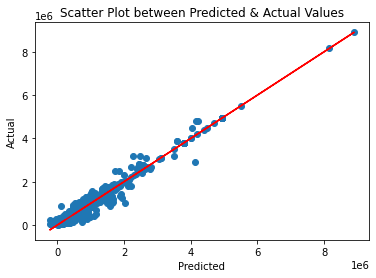

In [29]:
plt.scatter(y_pred_train, y_train)

a, b = np.polyfit(y_pred_train, y_train, 1)
plt.plot(y_pred_train, a*y_pred_train + b, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 -7972536954.626769
mean_squared_error =		 2.1653965074852246e+21
mean_absolute_error =		 4055692080.7471457
mean_absolute_percentage_error = 9303.816340758718


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

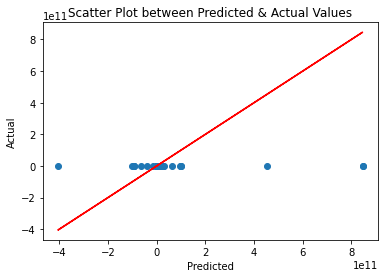

In [31]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [32]:
import pickle

In [33]:
pickle.dump((reg, 
             vectorizer, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('car_price_normaleq.pickle', 'wb'))